In [7]:
# 超参数（Hyperparameter）

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

In [8]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [9]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [11]:
# 超参数：学习率learning_rate
# 权重值更新w = w + gradient * learning_rate
# learning_rates = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 3e-1]
learning_rates = [1e-2, 3e-2, 3e-1, 1e-3]
histories=[]
for lr in learning_rates:
    model=keras.models.Sequential([keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
                                   keras.layers.Dense(1),])
    optimizer=keras.optimizers.SGD(lr)
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 20,
                        callbacks = callbacks)
    histories.append(history)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9379 - val_loss: 0.8460
Epoch 2/20
363/363 [==============================] - 0s 998us/step - loss: 0.8287 - val_loss: 0.4947
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.4503
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4162 - val_loss: 0.4293
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4021 - val_loss: 0.4152
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3918 - val_loss: 0.4056
Epoch 7/20
363/363 [==============================] - 0s 995us/step - loss: 0.3913 - val_loss: 0.3988
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3787 - val_loss: 0.3947
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - val_loss: 0.5577
Epoch 10/20
363/363 [==============================] - 0s 982us/step - loss: 0.3718 - val_loss: 

Learning rate:  0.01
0.347261518239975 0.361363023519516


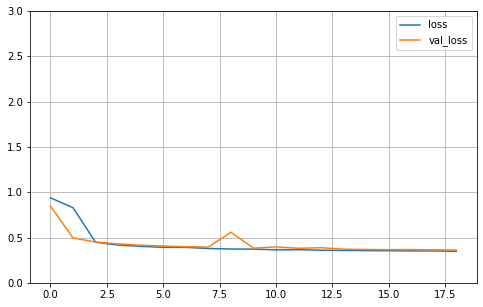

Learning rate:  0.03
0.3755470812320709 0.3911360204219818


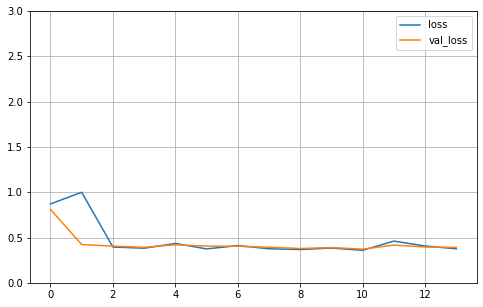

Learning rate:  0.3
nan nan


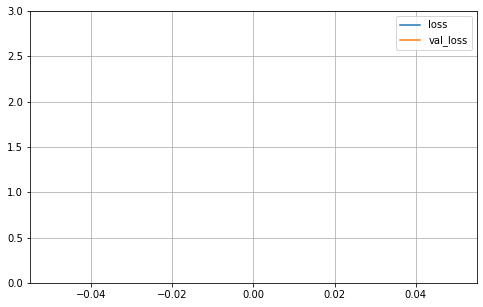

Learning rate:  0.001
0.47441065311431885 0.5108294486999512


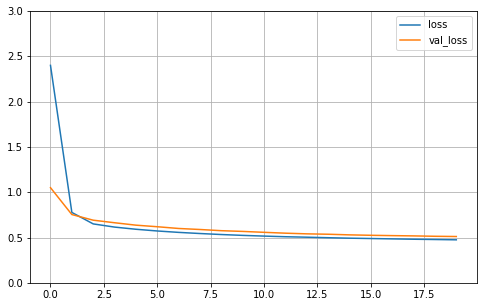

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()
for lr,history in zip(learning_rates,histories):
    print("Learning rate: ", lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_learning_curves(history)


In [15]:
# print(history.history)
history.history

{'loss': [2.3999183177948,
  0.7766619324684143,
  0.6500069499015808,
  0.6148788928985596,
  0.5909883379936218,
  0.5719935297966003,
  0.5565072894096375,
  0.5439029335975647,
  0.5327558517456055,
  0.5234098434448242,
  0.5155250430107117,
  0.5084549188613892,
  0.5032752752304077,
  0.4976213872432709,
  0.4924612045288086,
  0.4887167811393738,
  0.4847090542316437,
  0.4808705151081085,
  0.47773802280426025,
  0.47441065311431885],
 'val_loss': [1.0500051975250244,
  0.7533324956893921,
  0.6911115050315857,
  0.6628966927528381,
  0.6361475586891174,
  0.6188620328903198,
  0.5996335744857788,
  0.5883262753486633,
  0.5751690864562988,
  0.5671418905258179,
  0.5571475625038147,
  0.5476455688476562,
  0.5402964353561401,
  0.5359436869621277,
  0.529076099395752,
  0.5243598222732544,
  0.5207354426383972,
  0.5176740884780884,
  0.5134351849555969,
  0.5108294486999512]}